In [1]:
import tensorflow as tf
tf.keras.backend.clear_session()
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [2]:
folder_test = '../archive/test/'
folder_train = '../archive/train'
folder_valid = '../archive/valid'
# Use the 'datagen' to preprocess the images loaded by 'image_data_from_directory'
train_scaled_data = train_datagen.flow_from_directory(
    folder_train,
    target_size=(224, 224),
    shuffle=True,
    class_mode="categorical"
)
test_scaled_data = test_datagen.flow_from_directory(
    folder_test,
    target_size=(224, 224),shuffle=True,
    class_mode="categorical"
)

valid_scaled_data = test_datagen.flow_from_directory(
    folder_valid,
    target_size=(224, 224),shuffle=True
    ,class_mode="categorical"
)

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(515, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.Dense(525, activation='softmax'),
])

# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [5]:

# fit model
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                          patience=10, min_lr=0.001)
model.fit(train_scaled_data, epochs=12,  batch_size=64,validation_data=valid_scaled_data, callbacks=[reduce_lr])

Epoch 1/12
2645/2645 [==============================] - 1278s 483ms/step - loss: 5.0333 - accuracy: 0.0908 - val_loss: 3.4571 - val_accuracy: 0.2754 - lr: 0.0100
Epoch 2/12
2645/2645 [==============================] - 1267s 479ms/step - loss: 3.1234 - accuracy: 0.3400 - val_loss: 2.1798 - val_accuracy: 0.5063 - lr: 0.0100
Epoch 3/12
2645/2645 [==============================] - 1269s 480ms/step - loss: 2.2944 - accuracy: 0.4859 - val_loss: 1.7110 - val_accuracy: 0.5973 - lr: 0.0100
Epoch 4/12
2645/2645 [==============================] - 1261s 477ms/step - loss: 1.8646 - accuracy: 0.5676 - val_loss: 1.4868 - val_accuracy: 0.6537 - lr: 0.0100
Epoch 5/12
2645/2645 [==============================] - 1275s 482ms/step - loss: 1.5746 - accuracy: 0.6283 - val_loss: 1.4240 - val_accuracy: 0.6728 - lr: 0.0100
Epoch 6/12
2645/2645 [==============================] - 1274s 482ms/step - loss: 1.3744 - accuracy: 0.6696 - val_loss: 1.3671 - val_accuracy: 0.6857 - lr: 0.0100
Epoch 7/12
2645/2645 [======

In [8]:
model.save("modelo_1.h5")

/usr/local/Caskroom/miniforge/base/envs/myenv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
modelo = tf.keras.models.load_model("modelo_1.h5")

In [12]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

In [17]:
from sklearn.metrics import confusion_matrix, classification_report


test_loss, test_accuracy = modelo.evaluate(test_scaled_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


predictions = modelo.predict(test_scaled_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_scaled_data.classes

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

83/83 [==============================] - 12s 143ms/step - loss: 1.0775 - accuracy: 0.7585
Test Loss: 1.077543020248413
Test Accuracy: 0.758476197719574
83/83 [==============================] - 12s 142ms/step
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


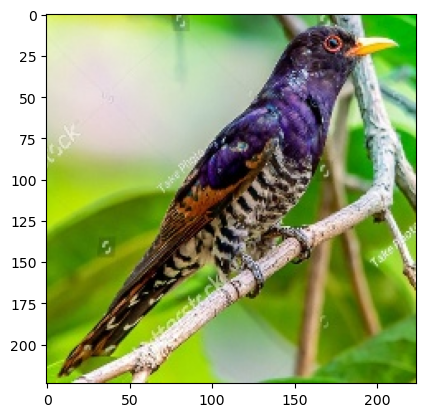

1/1 [==============================] - 0s 21ms/step

496
1.0
VIOLET CUCKOO


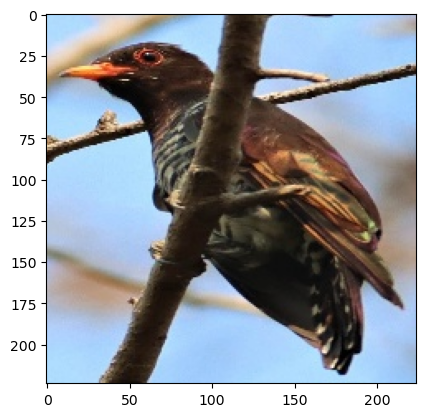

1/1 [==============================] - 0s 20ms/step

496
0.99950325
VIOLET CUCKOO


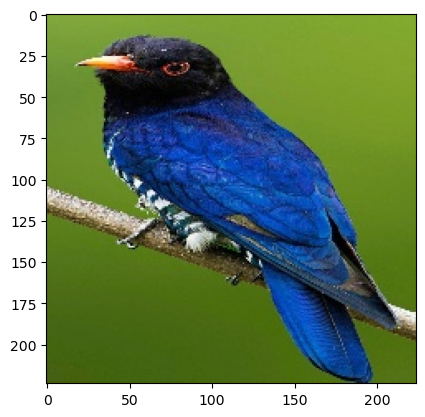

1/1 [==============================] - 0s 23ms/step

40
0.9657416
ASIAN DOLLARD BIRD


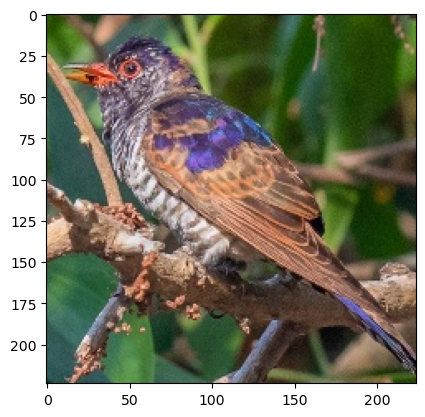

1/1 [==============================] - 0s 20ms/step

496
0.9851479
VIOLET CUCKOO


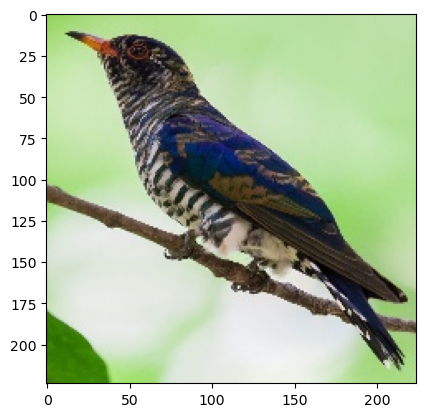

1/1 [==============================] - 0s 25ms/step

496
0.99996305
VIOLET CUCKOO


In [16]:
clases = {v: k for k, v in train_scaled_data.class_indices.items()}
dir_path = '../archive/valid/VIOLET CUCKOO/'

for i in os.listdir(dir_path):
    #print(i)
    img = image.load_img(dir_path + "//" + i, target_size = (224, 224)) # Lectura 
    plt.imshow(img)
    plt.show()


    # X = image.img_to_array(img) # convierte en array 
    X = image.img_to_array(img) /255
    X = np.expand_dims(X, axis = 0) #
    images = np.vstack([X]) #
    val = modelo.predict(images)

    print()
    print(np.argmax(val[0]))
    print(val[0][np.argmax(val[0])])
    print(clases[np.argmax(val[0])])